IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Trying to unpickle estimator GradientBoostingClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator ExtraTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator ExtraTreesClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-lim

Model 1 - TreeEnsemble:


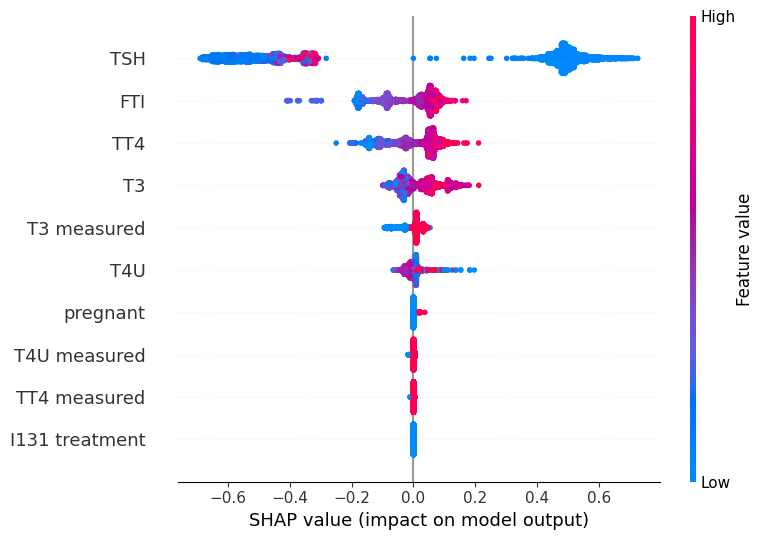

Model 2 - TreeEnsemble:


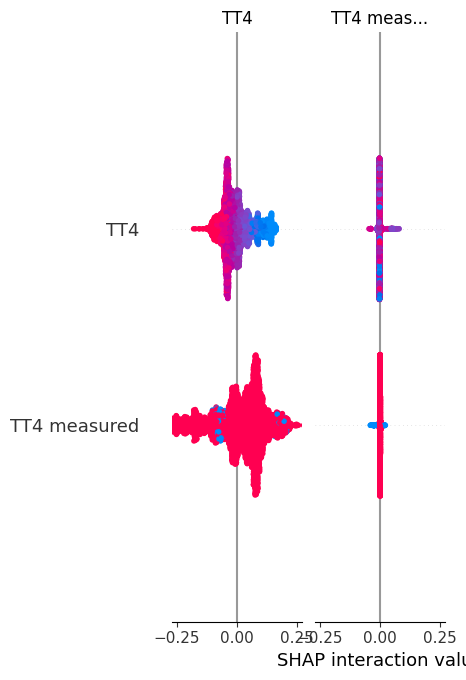

Model 3 - TreeEnsemble:


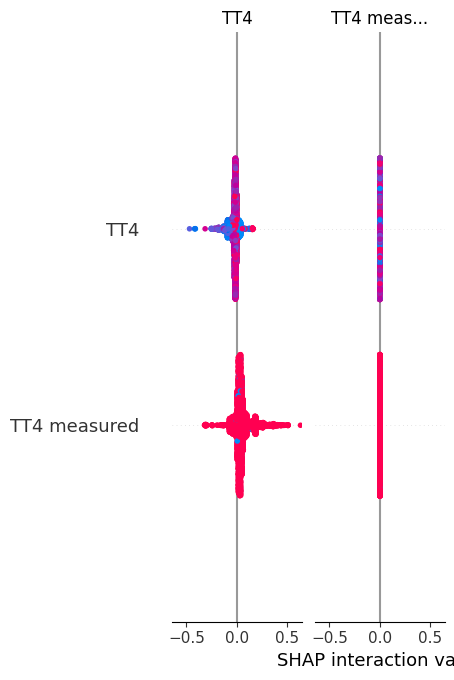

In [1]:
import joblib
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Ajuste o tamanho da fonte
plt.rcParams.update({'font.size': 10})

# Carregue o modelo de empilhamento
stacking_model = joblib.load('/workspaces/thyroid_disease_AI/thyroid_disease_AI/models_file/StackingModel.sav')

# Dados de teste a partir do arquivo CSV
X_train = pd.read_csv('/workspaces/thyroid_disease_AI/thyroid_disease_AI/datasets/hypothyroid/input_train.csv')

# Obtenha os modelos base do empilhamento
base_models = stacking_model.estimators_

# Crie um explainer para cada modelo base
explainers = [shap.Explainer(model) for model in base_models]

# Calcule os valores SHAP para cada modelo base
shap_values = [explainer(X_train) for explainer in explainers]

for i, explainer in enumerate(explainers):
    print(f"Model {i+1} - {type(explainer.model).__name__}:")
    shap.summary_plot(shap_values[i], X_train, feature_names=X_train.columns, show=False)
    plt.show()




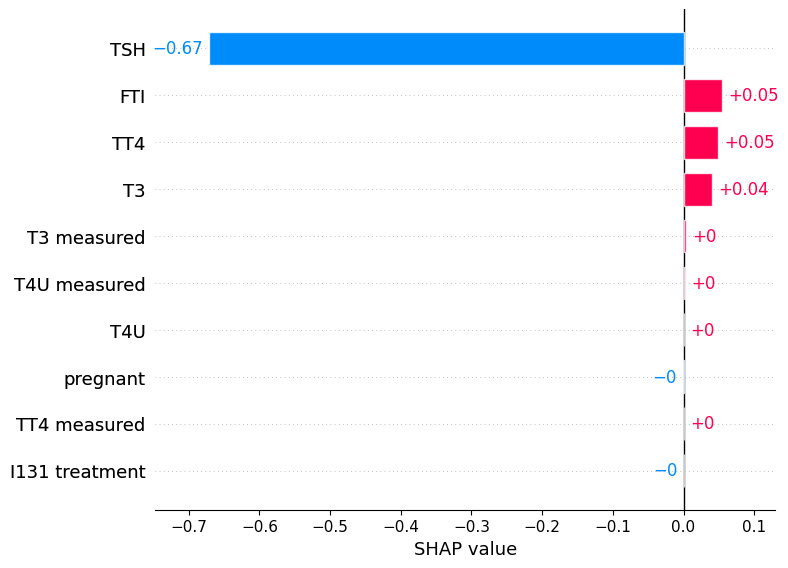

In [11]:
# plot showing the impact of each feature on the output 
# select the instance to explain

#choose the features 

shap.plots.bar(shap_values[0][0])
#shap.plots.waterfall(shap_values[0][0])
plt.show()
#this plot show the impact of each feature on the output. With higher values being more important for the model output and negative values being less important.


In [12]:
print(base_models)

[GradientBoostingClassifier(learning_rate=0.02, max_depth=5, max_features='sqrt',
                           n_estimators=20, subsample=0.09), ExtraTreesClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=4,
                     n_estimators=50), DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=24, random_state=42)]


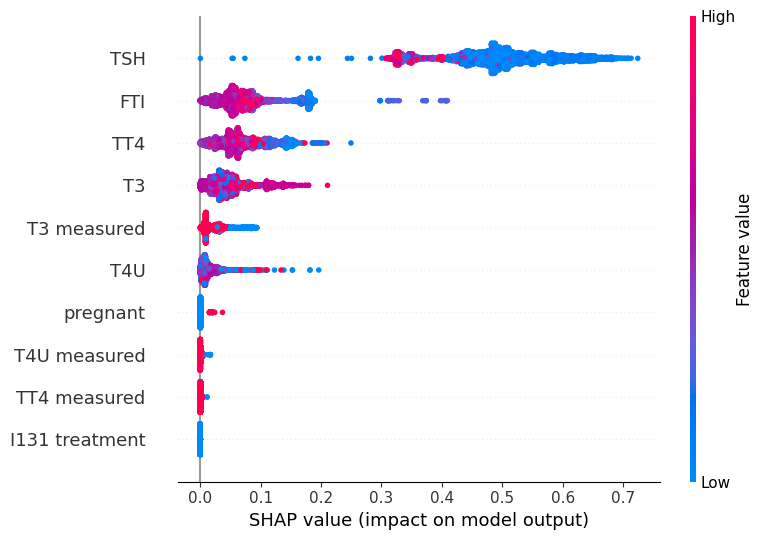

In [7]:
shap.summary_plot(shap_values[0].abs, X_train, feature_names=X_train.columns,  show=False)



#save the plot figure in eps format
fig = plt.gcf()
fig.savefig('shap.eps', format='eps')

#plt.show()